In [2]:
import re

# Import csv file
# Separate csv file into input_sequences (line breaks?)

# Find virus sequences in input_sequence with re .search and .findall
# Capture first 5(?)letters of sequence and set as sequence name
# re.findall will make a list with all the occurances of the viral seq as entries
#     Scan through each sequence one at a time with findall and transfer results to matrix (dictionary?) before moving to the next sequence
#     len(list) = # of viral seqs in input_sequence
#     len(list)/len(input_sequence)/1000 = VBS
# How to generate SSS? Fuzzy strings?
# re.search will give start and stop location of sequence as the span=(start,stop)
#     ! Limited to first search per sequence...
#     How to access the span? 
#        m = re.match()
#        m.span([group]) --> (m.start(group), m.end(group))

# Generating Outputs
# ------------------
# Create table of SSSs (Input_sequences on Y axis vs Virus_seq on X axis)
# Create scatter plot of VBS (VBS vs CNV intensity)
#     Where does the CNV intensity come from? How do I get those values?
# File output: 
#     Input_sequence matched from,
#     Virus (e.g. BKPyV, HPV, etc.),
#     Matched virus seq name, 
#     site start and end (from re.search), 
#     full virus seq (directly from re.findall at the same time it's passed to Table of SSS?)

In [4]:
# Converting degenerate viral sequences from IUPAC to Regex
# BK LT (BK Polyomavirus Large T antigen)
    IUPAC: GRGGCN(1,30)GCCYC
    Regex: (G[AG]GGC[ATCG]{1:30}GCC[CT]C)
# EBNA1 (Epstein Barr virus Nuclear Antigen 1)
    IUPAC: GRTAGCNNNNGCTAYC
    Regex: (G[AG]TAGC[ATCG]{4}GCTA[CT]C)
# HPV E1 (Human Papillomavirus E1 protein)
    IUPAC: ATDGYYNNNRRCHAT
    Regex: (AT[AGT]G[CT]{2}[ATCG]{3}[AG]{2}C[ACT]AT)
# HPV E2 (Human Papillomavirus E2 protein)
    IUPAC: ACCGNNNNCGGT
    Regex: (ACCG[ATCG]{4}CGGT)

IndentationError: unexpected indent (<ipython-input-4-85147f3be27f>, line 3)

In [5]:
# File output columns (CNV-virus match table): DONE
#     CNV sequence name = col["GCD Aliqot"] (+col["Chromosome"]+col["Start"]+"-"+col["End"])??
#     Virus (e.g. BKPyV, HPV, etc.) = type out as string for each
#     Site start = match.start() + 1
#     Site end = match.end() + 1
#     full virus seq = match.group()

# Virus-binding score table columns:
#    CNV_name = col["GCD Aliqot"] (+col["Chromosome"]+col["Start"]+"-"+col["End"])??
#    VBS = No of matches/kb = Add +1 to VBS_counter each iteration, place over ((match.end() - match.start())/1000)
#        Require if loop each time it adds to counter
#    Will require one VBS counter per virus type

# VBS vs CNV Scatter plot:
#    Sliced from VBS table as lists?

In [18]:
# Import csv file table as a pandas dataframe
import pandas as pd
input_data = pd.read_csv("/Users/nealtt/Documents/Presentations/results4_test.csv", sep='\t', index_col=0)

# Initialize variables, for appending later
Match_list = []
VBS_list = []
BKLT_VBS_count = 0
EBNA1_VBS_count = 0
HPVE1_VBS_count = 0
HPVE2_VBS_count = 0
Scatter_VBS = []
Scatter_CNV = []

# Establish degenerate virus regex sequences as variables
import re

BK_LT = re.compile(r"G[AG]GGC[ATCG]{1,30}GCC[CT]C")
EBNA1 = re.compile(r"G[AG]TAGC[ATCG]{4}GCTA[CT]C")
HPV_E1 = re.compile(r"AT[AGT]G[CT]{2}[ATCG]{3}[AG]{2}C[ACT]AT")
HPV_E2 = re.compile(r"ACCG[ATCG]{4}CGGT")

# Find virus sequences in input_sequence with re.finditer
for index, row in input_data.iterrows():
    #Reset list of CNV VBSs for each new CNV and label with new CNV name
    CNV_VBS = []
    CNV_VBS.append(row["GDC_Aliquot"])
    #Reset VBS counts for each new CNV
    BKLT_VBS_count = 0
    EBNA1_VBS_count = 0
    HPVE1_VBS_count = 0
    HPVE2_VBS_count = 0
    
###
    BK_iter = BK_LT.finditer(row["Sequence"])
    if BK_iter:
        for match in BK_iter:
            #Assembling match list
            temp_match_list = []
            temp_match_list.append(row["GDC_Aliquot"])
            temp_match_list.append("BK Polyomavirus Large T Anitgen")
            temp_match_list.append(match.start()+1)
            temp_match_list.append(match.end()+1)
            temp_match_list.append(match.group())
            Match_list.append(temp_match_list)
            
            #Adding 1 to numerator of VBS count for each CNV every time a match is found
            BKLT_VBS_count += 1
    #Adding total BK VBS to list of VBSs for this CNV
    CNV_VBS.append(BKLT_VBS_count/(row["Length"]/1000))
    
    #Adding VBS values to lists for scatter plot
    Scatter_VBS.append(BKLT_VBS_count/(row["Length"]/1000))
    Scatter_CNV.append(row["Segment_Mean"])
    
###
    EBNA1_iter = EBNA1.finditer(row["Sequence"])
    if EBNA1_iter:
        for match in EBNA1_iter:
            #Assembling match list
            temp_match_list = []
            temp_match_list.append(row["GDC_Aliquot"])
            temp_match_list.append("Epstein–Barr Virus Nuclear Antigen 1")
            temp_match_list.append(match.start()+1)
            temp_match_list.append(match.end()+1)
            temp_match_list.append(match.group())
            Match_list.append(temp_match_list)
            
            #Adding 1 to numerator of VBS count for each CNV every time a match is found
            EBNA1_VBS_count += 1
    #Adding total BK VBS to list of VBSs for this CNV
    CNV_VBS.append(EBNA1_VBS_count/(row["Length"]/1000))
    
    #Adding VBS values to lists for scatter plot
    Scatter_VBS.append(EBNA1_VBS_count/(row["Length"]/1000))
    Scatter_CNV.append(row["Segment_Mean"])
        
###
    HPVE1_iter = HPV_E1.finditer(row["Sequence"])
    if HPVE1_iter:
        for match in HPVE1_iter:
            #Assembling match list
            temp_match_list = []
            temp_match_list.append(row["GDC_Aliquot"])
            temp_match_list.append("Human Papillomavirus E1 Protein")
            temp_match_list.append(match.start()+1)
            temp_match_list.append(match.end()+1)
            temp_match_list.append(match.group())
            Match_list.append(temp_match_list)
            
            #Adding 1 to numerator of VBS count for each CNV every time a match is found
            HPVE1_VBS_count += 1
    #Adding total BK VBS to list of VBSs for this CNV
    CNV_VBS.append(HPVE1_VBS_count/(row["Length"]/1000))
    
    #Adding VBS values to lists for scatter plot
    Scatter_VBS.append(HPVE1_VBS_count/(row["Length"]/1000))
    Scatter_CNV.append(row["Segment_Mean"])
        
###
    HPVE2_iter = HPV_E2.finditer(row["Sequence"])
    if HPVE2_iter:
        for match in HPVE2_iter:
            #Assembling match list
            temp_match_list = []
            temp_match_list.append(row["GDC_Aliquot"])
            temp_match_list.append("Human Papillomavirus E2 Protein")
            temp_match_list.append(match.start()+1)
            temp_match_list.append(match.end()+1)
            temp_match_list.append(match.group())
            Match_list.append(temp_match_list)
            
            #Adding 1 to numerator of VBS count for each CNV every time a match is found
            HPVE2_VBS_count += 1
    #Adding total BK VBS to list of VBSs for this CNV
    CNV_VBS.append(HPVE2_VBS_count/(row["Length"]/1000))
    
    #Adding VBS values to lists for scatter plot
    Scatter_VBS.append(HPVE2_VBS_count/(row["Length"]/1000))
    Scatter_CNV.append(row["Segment_Mean"])
        
###
    #Adding list of all VBSs for this CNV to the list of lists before moving to next row/CNV
    VBS_list.append(CNV_VBS)

# Turn match list of lists into pandas dataframe and output CSV file
CNV_virus_match_table = pd.DataFrame(Match_list, columns=["CNV ID","Viral Protein","Loci Start", "Loci End", "Viral Sequence"])
CNV_virus_match_table.style.set_caption("Viral Protein Sequences within Copy Number Variation Sequences")
CNV_virus_match_table.to_csv('Summary_of_CNV_virus_matches.csv')

# Turn VBS list of lists into a pandas dataframe and print
VBS_table = pd.DataFrame(VBS_list, columns=["CNV ID", "BKPyV LT", "EBNA1", "HPV E1", "HPV E2"])
VBS_table.style.set_caption("Virus Binding Scores")

# Create and print out scatter plot
import matplotlib.pyplot as plt
plt.scatter(Scatter_CNV, Scatter_VBS)
plt.title("Virus Binding Score Correlates to CNV Intensity")
plt.xlabel("CNV Intensity")
plt.ylabel("Virus Binding Score")
plt.show()

KeyError: 'Sequence'

In [14]:
input_data.head()

,index,GDC_Aliquot,Chromosome,Start,End,Segment_Mean,Length,0
0,33,7d934540-c6ac-44ef-b709-1ded409544c4,11,126679350,126679362,1.6330,12,GAAACATACCTA
1,52,7d934540-c6ac-44ef-b709-1ded409544c4,16,54837218,54843565,0.6201,6347,ATGACTTCTATGGGCTCCTGGCACTTTGCCTGTGTGGATCCCTTCC...
2,54,7d934540-c6ac-44ef-b709-1ded409544c4,16,60135042,60193214,0.5765,58172,CCATGTAGCATAGTTTAAAGTCAGGTAATGTGATGCCTCCAGGTTT...


                                 CNV_ID                         Viral_Protein  \
0  7d934540-c6ac-44ef-b709-1ded409544c4       BK Polyomavirus Large T Anitgen   
1  7d934540-c6ac-44ef-b709-1ded409544c4       BK Polyomavirus Large T Anitgen   
2  7d934540-c6ac-44ef-b709-1ded409544c4       BK Polyomavirus Large T Anitgen   
3  7d934540-c6ac-44ef-b709-1ded409544c4       BK Polyomavirus Large T Anitgen   
4  7d934540-c6ac-44ef-b709-1ded409544c4  Epstein–Barr Virus Nuclear Antigen 1   
5  7d934540-c6ac-44ef-b709-1ded409544c4       Human Papillomavirus E1 Protein   

   Loci_Start  Loci_End         Viral_Sequence  
0       15812     15823            GAGGCTGCCTC  
1       26218     26238   GAGGCTGGGCACGGTGCCTC  
2       43520     43541  GAGGCTAGACGGGCAGGCCTC  
3       52018     52039  GAGGCTTGCTTGTCCTGCCTC  
4       16601     16617       GGTAGCATTTGCTACC  
5       49418     49433        ATGGCTGAAAGCCAT  
                                 CNV_ID  BKPyV_LT    EBNA1   HPV_E1  HPV_E2
0  7d934540-c

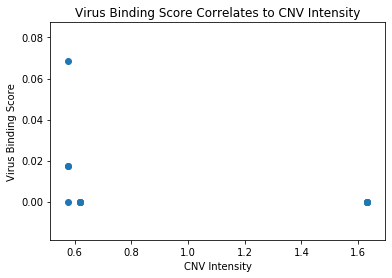

In [22]:
# Import csv file table as a pandas dataframe
import pandas as pd
input_data = pd.read_csv("/Users/nealtt/Documents/Presentations/results4_test.csv", sep='\t', index_col=0)

# Initialize variables, for appending later
Match_list = []
VBS_list = []
BKLT_VBS_count = 0
EBNA1_VBS_count = 0
HPVE1_VBS_count = 0
HPVE2_VBS_count = 0
Scatter_VBS = []
Scatter_CNV = []

# Establish degenerate virus regex sequences as variables
import re

BK_LT = re.compile(r"G[AG]GGC[ATCG]{1,30}GCC[CT]C")
EBNA1 = re.compile(r"G[AG]TAGC[ATCG]{4}GCTA[CT]C")
HPV_E1 = re.compile(r"AT[AGT]G[CT]{2}[ATCG]{3}[AG]{2}C[ACT]AT")
HPV_E2 = re.compile(r"ACCG[ATCG]{4}CGGT")

# Find virus sequences in input_sequence with re.finditer
for index, row in input_data.iterrows():
    #Reset list of CNV VBSs for each new CNV and label with new CNV name
    CNV_VBS = []
    CNV_VBS.append(row["GDC_Aliquot"])
    #Reset VBS counts for each new CNV
    BKLT_VBS_count = 0
    EBNA1_VBS_count = 0
    HPVE1_VBS_count = 0
    HPVE2_VBS_count = 0
    
###
    BK_iter = BK_LT.finditer(row["0"])
    if BK_iter:
        for match in BK_iter:
            #Assembling match list
            temp_match_list = []
            temp_match_list.append(row["GDC_Aliquot"])
            temp_match_list.append("BK Polyomavirus Large T Anitgen")
            temp_match_list.append(match.start()+1)
            temp_match_list.append(match.end()+1)
            temp_match_list.append(match.group())
            Match_list.append(temp_match_list)
            
            #Adding 1 to numerator of VBS count for each CNV every time a match is found
            BKLT_VBS_count += 1
    #Adding total BK VBS to list of VBSs for this CNV
    CNV_VBS.append(BKLT_VBS_count/(row["Length"]/1000))
    
    #Adding VBS values to lists for scatter plot
    Scatter_VBS.append(BKLT_VBS_count/(row["Length"]/1000))
    Scatter_CNV.append(row["Segment_Mean"])
    
###
    EBNA1_iter = EBNA1.finditer(row["0"])
    if EBNA1_iter:
        for match in EBNA1_iter:
            #Assembling match list
            temp_match_list = []
            temp_match_list.append(row["GDC_Aliquot"])
            temp_match_list.append("Epstein–Barr Virus Nuclear Antigen 1")
            temp_match_list.append(match.start()+1)
            temp_match_list.append(match.end()+1)
            temp_match_list.append(match.group())
            Match_list.append(temp_match_list)
            
            #Adding 1 to numerator of VBS count for each CNV every time a match is found
            EBNA1_VBS_count += 1
    #Adding total BK VBS to list of VBSs for this CNV
    CNV_VBS.append(EBNA1_VBS_count/(row["Length"]/1000))
    
    #Adding VBS values to lists for scatter plot
    Scatter_VBS.append(EBNA1_VBS_count/(row["Length"]/1000))
    Scatter_CNV.append(row["Segment_Mean"])
        
###
    HPVE1_iter = HPV_E1.finditer(row["0"])
    if HPVE1_iter:
        for match in HPVE1_iter:
            #Assembling match list
            temp_match_list = []
            temp_match_list.append(row["GDC_Aliquot"])
            temp_match_list.append("Human Papillomavirus E1 Protein")
            temp_match_list.append(match.start()+1)
            temp_match_list.append(match.end()+1)
            temp_match_list.append(match.group())
            Match_list.append(temp_match_list)
            
            #Adding 1 to numerator of VBS count for each CNV every time a match is found
            HPVE1_VBS_count += 1
    #Adding total BK VBS to list of VBSs for this CNV
    CNV_VBS.append(HPVE1_VBS_count/(row["Length"]/1000))
    
    #Adding VBS values to lists for scatter plot
    Scatter_VBS.append(HPVE1_VBS_count/(row["Length"]/1000))
    Scatter_CNV.append(row["Segment_Mean"])
        
###
    HPVE2_iter = HPV_E2.finditer(row["0"])
    if HPVE2_iter:
        for match in HPVE2_iter:
            #Assembling match list
            temp_match_list = []
            temp_match_list.append(row["GDC_Aliquot"])
            temp_match_list.append("Human Papillomavirus E2 Protein")
            temp_match_list.append(match.start()+1)
            temp_match_list.append(match.end()+1)
            temp_match_list.append(match.group())
            Match_list.append(temp_match_list)
            
            #Adding 1 to numerator of VBS count for each CNV every time a match is found
            HPVE2_VBS_count += 1
    #Adding total BK VBS to list of VBSs for this CNV
    CNV_VBS.append(HPVE2_VBS_count/(row["Length"]/1000))
    
    #Adding VBS values to lists for scatter plot
    Scatter_VBS.append(HPVE2_VBS_count/(row["Length"]/1000))
    Scatter_CNV.append(row["Segment_Mean"])
        
###
    #Adding list of all VBSs for this CNV to the list of lists before moving to next row/CNV
    VBS_list.append(CNV_VBS)

# Turn match list of lists into pandas dataframe and output CSV file
CNV_virus_match_table = pd.DataFrame(Match_list, columns=["CNV_ID","Viral_Protein","Loci_Start", "Loci_End", "Viral_Sequence"])
CNV_virus_match_table.style.set_caption("Viral Protein Sequences within Copy Number Variation Sequences")
print(CNV_virus_match_table)
CNV_virus_match_table.to_csv('Summary_of_CNV_virus_matches.csv', sep='\t')

# Turn VBS list of lists into a pandas dataframe and print
VBS_table = pd.DataFrame(VBS_list, columns=["CNV_ID", "BKPyV_LT", "EBNA1", "HPV_E1", "HPV_E2"])
VBS_table.style.set_caption("Virus Binding Scores")
print(VBS_table)

# Create and print out scatter plot
import matplotlib.pyplot as plt
plt.scatter(Scatter_CNV, Scatter_VBS)
plt.title("Virus Binding Score Correlates to CNV Intensity")
plt.xlabel("CNV Intensity")
plt.ylabel("Virus Binding Score")
plt.show()

In [9]:
import pandas as pd
new_input_data = pd.read_csv("cnv_results_final.csv", sep='\t', index_col=0)
new_input_data.head()

,GDC_Aliquot,Chromosome,Start,End,Segment_Mean,Length,Sequence
index,,,,,,,
6,5a456ee8-0991-45be-92d8-d30f8ec0455c,1,27294806,27376554,0.5868,81748,TCAGTCTTTTTATTTCATTTTTTCTTAATGAACTAGATAGAAATAT...
9,5a456ee8-0991-45be-92d8-d30f8ec0455c,1,28782467,28983899,1.0996,201432,AGCAAGTCGTTAGGCTTGGCCTGTTTGGGAAGTGAGGGACCTGGGC...
10,5a456ee8-0991-45be-92d8-d30f8ec0455c,1,28984562,29001818,1.6893,17256,GAAGTAAATTTACTTGAATAAATTTAGAGAATGCCTTTGCAGTTTG...
20,5a456ee8-0991-45be-92d8-d30f8ec0455c,1,40267986,40673375,1.1267,405389,TAGTCCTTGGTTACCCATGCTGTATTGGCATAACATTAGTTACAAT...
21,5a456ee8-0991-45be-92d8-d30f8ec0455c,1,40673912,40688337,0.6618,14425,ATTAAATGAGAAAACATATGTAAAGTGATCAGCAGTGACTGGTATA...


In [10]:
# Import csv file table as a pandas dataframe
import pandas as pd
input_data = pd.read_csv("cnv_results_final.csv", sep='\t', index_col=0)

# Initialize variables, for appending later
Match_list = []
VBS_list = []
BKLT_VBS_count = 0
EBNA1_VBS_count = 0
HPVE1_VBS_count = 0
HPVE2_VBS_count = 0
Scatter_VBS = []
Scatter_CNV = []

# Establish degenerate virus regex sequences as variables
import re

BK_LT = re.compile(r"G[AG]GGC[ATCG]{1,30}GCC[CT]C")
EBNA1 = re.compile(r"G[AG]TAGC[ATCG]{4}GCTA[CT]C")
HPV_E1 = re.compile(r"AT[AGT]G[CT]{2}[ATCG]{3}[AG]{2}C[ACT]AT")
HPV_E2 = re.compile(r"ACCG[ATCG]{4}CGGT")

# Find virus sequences in input_sequence with re.finditer
for index, row in input_data.iterrows():
    #Reset list of CNV VBSs for each new CNV and label with new CNV name
    CNV_VBS = []
    CNV_VBS.append(row["GDC_Aliquot"])
    #Reset VBS counts for each new CNV
    BKLT_VBS_count = 0
    EBNA1_VBS_count = 0
    HPVE1_VBS_count = 0
    HPVE2_VBS_count = 0
    
###
    BK_iter = BK_LT.finditer(row["Sequence"])
    if BK_iter:
        for match in BK_iter:
            #Assembling match list
            temp_match_list = []
            temp_match_list.append(row["GDC_Aliquot"])
            temp_match_list.append("BK Polyomavirus Large T Anitgen")
            temp_match_list.append(match.start()+1)
            temp_match_list.append(match.end()+1)
            temp_match_list.append(match.group())
            Match_list.append(temp_match_list)
            
            #Adding 1 to numerator of VBS count for each CNV every time a match is found
            BKLT_VBS_count += 1
    #Adding total BK VBS to list of VBSs for this CNV
    CNV_VBS.append(BKLT_VBS_count/(row["Length"]/1000))
    
    #Adding VBS values to lists for scatter plot
    Scatter_VBS.append(BKLT_VBS_count/(row["Length"]/1000))
    Scatter_CNV.append(row["Segment_Mean"])
    
###
    EBNA1_iter = EBNA1.finditer(row["Sequence"])
    if EBNA1_iter:
        for match in EBNA1_iter:
            #Assembling match list
            temp_match_list = []
            temp_match_list.append(row["GDC_Aliquot"])
            temp_match_list.append("Epstein–Barr Virus Nuclear Antigen 1")
            temp_match_list.append(match.start()+1)
            temp_match_list.append(match.end()+1)
            temp_match_list.append(match.group())
            Match_list.append(temp_match_list)
            
            #Adding 1 to numerator of VBS count for every CNV found
            EBNA1_VBS_count += 1
    #Adding total BK VBS to list of VBSs for this CNV
    CNV_VBS.append(EBNA1_VBS_count/(row["Length"]/1000))
    
    #Adding VBS values to lists for scatter plot
    Scatter_VBS.append(EBNA1_VBS_count/(row["Length"]/1000))
    Scatter_CNV.append(row["Segment_Mean"])
        
###
    HPVE1_iter = HPV_E1.finditer(row["Sequence"])
    if HPVE1_iter:
        for match in HPVE1_iter:
            #Assembling match list
            temp_match_list = []
            temp_match_list.append(row["GDC_Aliquot"])
            temp_match_list.append("Human Papillomavirus E1 Protein")
            temp_match_list.append(match.start()+1)
            temp_match_list.append(match.end()+1)
            temp_match_list.append(match.group())
            Match_list.append(temp_match_list)
            
            #Adding 1 to numerator of VBS count for every CNV found
            HPVE1_VBS_count += 1
    #Adding total BK VBS to list of VBSs for this CNV
    CNV_VBS.append(HPVE1_VBS_count/(row["Length"]/1000))
    
    #Adding VBS values to lists for scatter plot
    Scatter_VBS.append(HPVE1_VBS_count/(row["Length"]/1000))
    Scatter_CNV.append(row["Segment_Mean"])
        
###
    HPVE2_iter = HPV_E2.finditer(row["Sequence"])
    if HPVE2_iter:
        for match in HPVE2_iter:
            #Assembling match list
            temp_match_list = []
            temp_match_list.append(row["GDC_Aliquot"])
            temp_match_list.append("Human Papillomavirus E2 Protein")
            temp_match_list.append(match.start()+1)
            temp_match_list.append(match.end()+1)
            temp_match_list.append(match.group())
            Match_list.append(temp_match_list)
            
            #Adding 1 to numerator of VBS count for every CNV found
            HPVE2_VBS_count += 1
    #Adding total BK VBS to list of VBSs for this CNV
    CNV_VBS.append(HPVE2_VBS_count/(row["Length"]/1000))
    
    #Adding VBS values to lists for scatter plot
    Scatter_VBS.append(HPVE2_VBS_count/(row["Length"]/1000))
    Scatter_CNV.append(row["Segment_Mean"])
        
###
    #Adding list of all VBSs for this CNV to the list of lists before moving to next row/CNV
    VBS_list.append(CNV_VBS)

# Turn match list of lists into pandas dataframe and output CSV file
CNV_virus_match_table = pd.DataFrame(Match_list, columns=["CNV_ID","Viral_Protein","Loci_Start", "Loci_End", "Viral_Sequence"])
CNV_virus_match_table.style.set_caption("Viral Protein Sequences within Copy Number Variation Sequences")
print(CNV_virus_match_table)
CNV_virus_match_table.to_csv('Summary_of_CNV_virus_matches.csv', sep='\t')

# Turn VBS list of lists into a pandas dataframe and print
VBS_table = pd.DataFrame(VBS_list, columns=["CNV_ID", "BKPyV_LT", "EBNA1", "HPV_E1", "HPV_E2"])
VBS_table.style.set_caption("Virus Binding Scores")
print(VBS_table)

# Create and print out scatter plot
import matplotlib.pyplot as plt
plt.scatter(Scatter_CNV, Scatter_VBS)
plt.title("Virus Binding Score Correlates to CNV Intensity")
plt.xlabel("CNV Intensity")
plt.ylabel("Virus Binding Score")
plt.show()

                                      CNV_ID                    Viral_Protein  \
0       5a456ee8-0991-45be-92d8-d30f8ec0455c  BK Polyomavirus Large T Anitgen   
1       5a456ee8-0991-45be-92d8-d30f8ec0455c  BK Polyomavirus Large T Anitgen   
2       5a456ee8-0991-45be-92d8-d30f8ec0455c  BK Polyomavirus Large T Anitgen   
3       5a456ee8-0991-45be-92d8-d30f8ec0455c  BK Polyomavirus Large T Anitgen   
4       5a456ee8-0991-45be-92d8-d30f8ec0455c  BK Polyomavirus Large T Anitgen   
...                                      ...                              ...   
331017  7177e675-148b-4d90-946a-2df35ecb1ef5  BK Polyomavirus Large T Anitgen   
331018  7177e675-148b-4d90-946a-2df35ecb1ef5  BK Polyomavirus Large T Anitgen   
331019  7177e675-148b-4d90-946a-2df35ecb1ef5  BK Polyomavirus Large T Anitgen   
331020  7177e675-148b-4d90-946a-2df35ecb1ef5  BK Polyomavirus Large T Anitgen   
331021  7177e675-148b-4d90-946a-2df35ecb1ef5  BK Polyomavirus Large T Anitgen   

        Loci_Start  Loci_En

<Figure size 640x480 with 1 Axes>

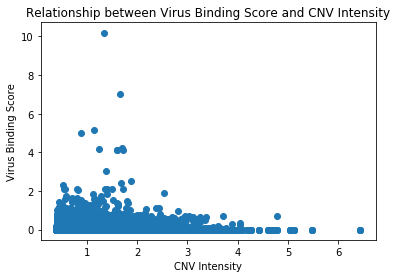

In [12]:
import matplotlib.pyplot as plt
plt.scatter(Scatter_CNV, Scatter_VBS)
plt.title("Relationship between Virus Binding Score and CNV Intensity")
plt.xlabel("CNV Intensity")
plt.ylabel("Virus Binding Score")
plt.show()